In [63]:
import numpy as np
import pandas as pd
import eurostat
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)  

In [27]:
df=pd.read_csv('./data/covid19_out_20200401.csv')

In [28]:
df.head()

cases     nuts3 country  PER_KM2_2018
0    292    Chieti      it         148.9
1    128  L'Aquila      it          59.6
2    631   Pescara      it         259.7
3    385    Teramo      it         157.8
4    114    Matera      it          57.4

In [29]:
dic=eurostat.get_dic('unit')

In [30]:
d=dict(dic)

In [31]:
d['PER_KM2']

'Persons per square kilometre'

In [34]:
df['ln_cases']=np.log(df['cases'])
df['ln_per_km2_2018']=np.log(df['PER_KM2_2018'])

# Italia

In [37]:
it=df[df['country']=='it']

In [39]:
it['ln_cases'].corr(it['ln_per_km2_2018'])

0.48758212553822267

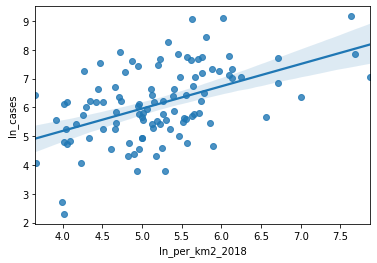

In [49]:
sns.regplot(x='ln_per_km2_2018', y='ln_cases', data=it)

In [54]:
fig = px.scatter(it, x='ln_per_km2_2018',y='ln_cases', hover_name='nuts3', trendline="lowess")
fig.show()

# Deutschland

In [40]:
de=df[df['country']=='de']

In [41]:
de['ln_cases'].corr(de['ln_per_km2_2018'])

0.3592492874466764

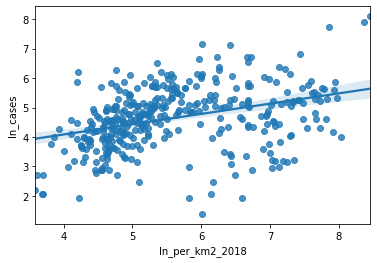

In [55]:
sns.regplot(x='ln_per_km2_2018', y='ln_cases', data=de)

In [56]:
fig = px.scatter(de, x='ln_per_km2_2018',y='ln_cases', hover_name='nuts3', trendline="lowess")
fig.show()

# Nederlands

In [43]:
nl=df[df['country']=='nl']

In [44]:
nl['ln_cases'].corr(nl['ln_per_km2_2018'])

0.760507089220423

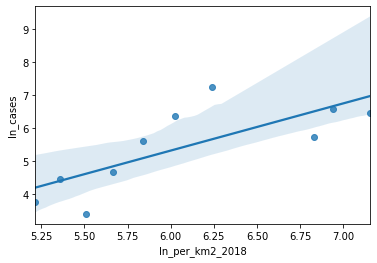

In [59]:
sns.regplot(x='ln_per_km2_2018', y='ln_cases', data=nl)

In [61]:
fig = px.scatter(nl, x='ln_per_km2_2018',y='ln_cases', hover_name='nuts3', trendline="ols")
fig.show()